# Naive bayes

In [91]:
data <- read.csv("../../data/processed/trained_cleaned.csv")
head(data)

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,19114.12,3,4,3,4,5,4,6.27,4,809.98,49.57495,268,2,2,7,115.7114,0.04237600,0.5714286
2,19114.12,3,4,3,4,6,0,11.27,4,809.98,49.57495,269,2,2,7,115.7114,0.04237600,0.0000000
3,19114.12,3,4,3,4,3,8,11.27,4,809.98,49.57495,271,2,2,7,115.7114,0.04237600,1.1428571
4,19114.12,3,4,3,4,3,6,11.27,4,809.98,49.57495,0,1,2,7,115.7114,0.04237600,0.8571429
5,34847.84,2,4,6,1,7,1,7.42,2,605.03,18.81621,320,2,2,6,100.8383,0.01736205,0.1666667
6,34847.84,2,4,6,1,3,3,5.42,2,605.03,18.81621,322,2,2,6,100.8383,0.01736205,0.5000000


In [92]:
library(e1071)
library(caTools)
library(caret)

In [93]:
data <- read.csv("../../data/processed/smote.csv")


X <- data[, !(names(data) %in% c("Credit_Score_Encoded"))]
y <- as.factor(data$Credit_Score)  


set.seed(42) 
train_index <- createDataPartition(y, p = 0.80, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [94]:
# Fitting Naive Bayes Model 
# to training dataset
set.seed(120)  # Setting Seed
classifier_cl <- naiveBayes(y_train ~ ., data = data.frame(cbind(X_train, y_train)), usekernel = TRUE)
classifier_cl


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace, usekernel = TRUE)

A-priori probabilities:
Y
        0         1         2 
0.3599958 0.4623462 0.1776580 

Conditional probabilities:
   Annual_Income
Y       [,1]     [,2]
  0 49226.88 36163.76
  1 48887.57 34371.01
  2 54957.23 37519.31

   Num_Bank_Accounts
Y       [,1]     [,2]
  0 4.479990 2.590047
  1 4.853535 2.137529
  2 3.309089 2.157055

   Num_Credit_Card
Y       [,1]     [,2]
  0 5.533285 1.704095
  1 4.920511 1.521561
  2 4.076928 1.759447

   Interest_Rate
Y        [,1]     [,2]
  0 11.953236 8.190233
  1 11.091424 5.428799
  2  7.172466 4.108442

   Num_of_Loan
Y       [,1]     [,2]
  0 2.628375 1.966457
  1 2.290689 1.708692
  2 1.896272 1.433424

   Delay_from_due_date
Y       [,1]      [,2]
  0 19.34796 12.023116
  1 15.84674  8.599234
  2 10.33720  7.024143

   Num_of_Delayed_Payment
Y        [,1]     [,2]
  0 10.451702 6.558937
  1 11.360333 5.871129
  2  7.70

In [95]:
predictions <- predict(classifier_cl, newdata = X_test)
 

In [96]:
#C matrix
confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0 2314  922  211
         1 2157 6924  820
         2 3260 2082 2784

Overall Statistics
                                          
               Accuracy : 0.5598          
                 95% CI : (0.5532, 0.5665)
    No Information Rate : 0.4623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3349          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.2993   0.6974   0.7298
Specificity            0.9176   0.7422   0.6975
Pos Pred Value         0.6713   0.6993   0.3426
Neg Pred Value         0.6995   0.7404   0.9228
Prevalence             0.3600   0.4623   0.1777
Detection Rate         0.1078   0.3224   0.1296
Detection Prevalence   0.1605   0.4611   0.3784
Balanced Accuracy      0.6084

In [97]:

# Extract TP, TN, FP, FN from the confusion matrix
TP <- confusion_matrix$table[2, 2]  # True Positives
TN <- confusion_matrix$table[1, 1]  # True Negatives
FP <- confusion_matrix$table[1, 2]  # False Positives
FN <- confusion_matrix$table[2, 1]  # False Negatives

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix$table)) / sum(confusion_matrix$table)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
f1_score <- 2 * ((precision * recall) / (precision + recall))

# Calculate specificity
specificity <- TN / (TN + FP)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")
cat("Specificity:", specificity, "\n")

Accuracy: 0.5598398 
Precision: 0.8824879 
Recall (Sensitivity): 0.7624711 
F1 Score: 0.8181013 
Specificity: 0.7150803 


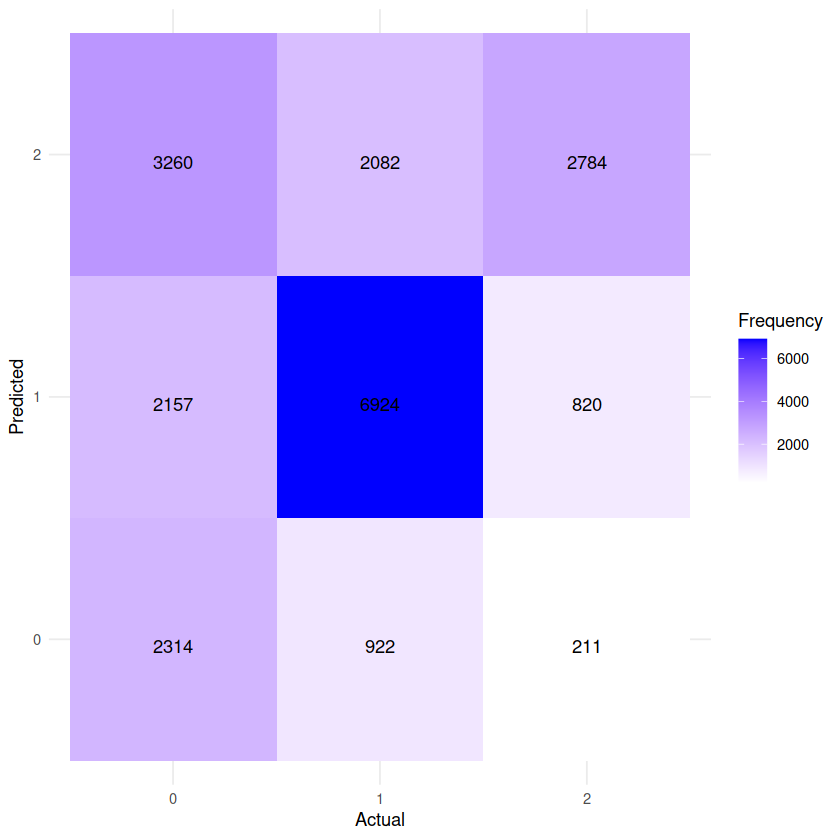

In [98]:
# Visualize the confusion matrix
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)

In [99]:
cm <- table(y_test, predictions)
cm

      predictions
y_test    0    1    2
     0 2314 2157 3260
     1  922 6924 2082
     2  211  820 2784

In [100]:
confusionMatrix(cm)

Confusion Matrix and Statistics

      predictions
y_test    0    1    2
     0 2314 2157 3260
     1  922 6924 2082
     2  211  820 2784

Overall Statistics
                                          
               Accuracy : 0.5598          
                 95% CI : (0.5532, 0.5665)
    No Information Rate : 0.4611          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3349          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.6713   0.6993   0.3426
Specificity            0.6995   0.7404   0.9228
Pos Pred Value         0.2993   0.6974   0.7298
Neg Pred Value         0.9176   0.7422   0.6975
Prevalence             0.1605   0.4611   0.3784
Detection Rate         0.1078   0.3224   0.1296
Detection Prevalence   0.3600   0.4623   0.1777
Balanced Accuracy      0.6854   0.7199   0.6327